# Python API Developer Challenge

### Description:
We have one file with the name books.csv. The CSV file contains the general information about the books, like book name, author, year of publication, etc. 
We want you to develop two API endpoints, where you can see the requirements below : 
API Endpoints:
1.	1st API will return number of rows requested from the books.csv file.
2.	2nd API will give freedom to the user to filter and see any data from the file. The user could only able to filter from the given column list. If a column is not present then a graceful error message should return. Even if the API didn’t find any filter response then the user should get a empty response.



In [1]:
######### Reading Data from CSV file ##########
import pandas as pd
df = pd.read_csv("books.csv",index_col ="id")
df.head()

,title,author,authors,isbn13,isbn10,price,publisher,pubyear,subjects,lexile,pages,dimensions
id,,,,,,,,,,,,
7,Introduction to African Oral Literature and Pe...,Bayo Ogunjimi,"Bayo Ogunjimi, Abdul Rasheed Na'allah",9.781590e+12,1592211518,$23.95,Africa World Press,2006,"Africa - Anthropology & Sociology, African Fol...",NaN,146.0,8.30 (w) x 5.30 (h) x 0.80 (d)
474,Out on the Porch: An Evocation in Words and Pi...,Reynolds Price,"Reynolds Price, Clifton Dowell, Reynolds Price",9.780950e+12,945575939,$1.99,Algonquin Books of Chapel Hill,1992,"Outdoor & Recreational Areas, American Literat...",NaN,128.0,8.36 (w) x 8.28 (h) x 0.50 (d)
424,"Friction, Volume 7: Best Gay Erotic Fiction",Jesse Grant,Jesse Grant,9.781560e+12,1555838278,$1.99,Alyson Books,2004,"Fiction, American Literature Anthologies, Anth...",NaN,368.0,5.40 (w) x 8.50 (h) x 0.80 (d)
236,"Love, Castro Street: Reflections of San Francisco",Katherine V. Forrest,"Katherine V. Forrest, Jim Van Buskirk",9.781560e+12,1555839975,$1.99,Alyson Books,2007,"American Literature Anthologies, Anthologies, ...",NaN,288.0,6.00 (w) x 9.00 (h) x 0.70 (d)
229,Up All Night: Adventures in Lesbian Sex,Stacy Bias,"Stacy Bias, Stacy M. Bias",9.781560e+12,1555837476,$1.99,Alyson Books,2004,"Short Story Anthologies, Peoples & Cultures - ...",NaN,264.0,5.40 (w) x 8.50 (h) x 0.60 (d)


<h2 style="color:green">File Hierarchy</h2>

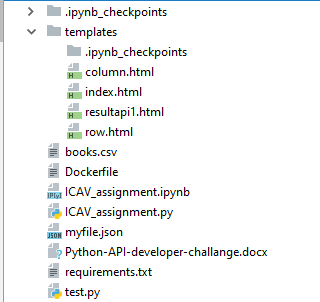

<h2 style="color:green">Index.html</h2>

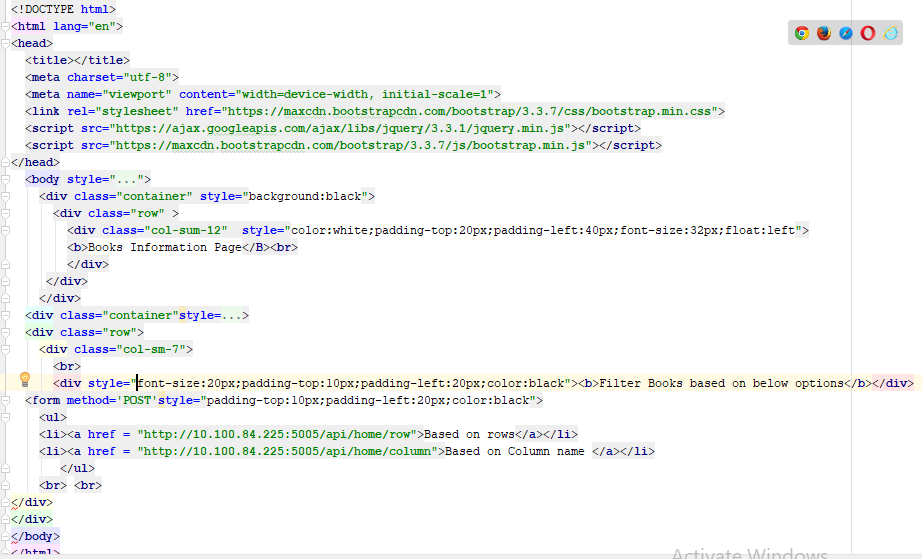
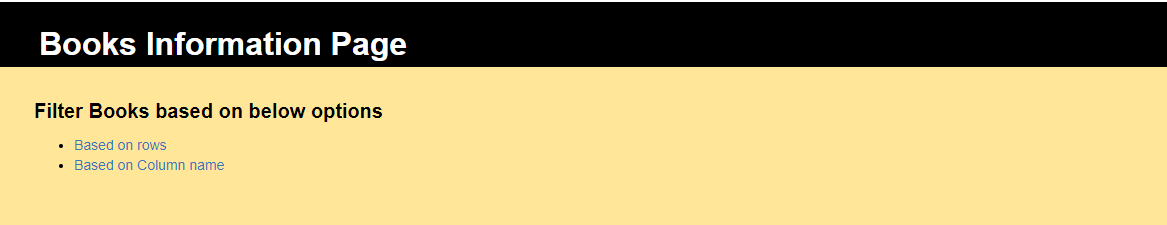

<h2 style="color:green">row.html</h2>

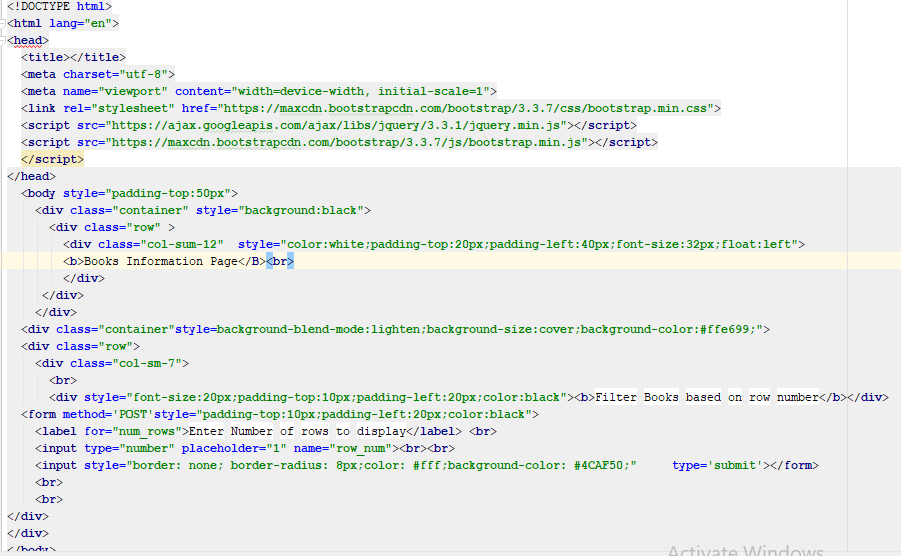
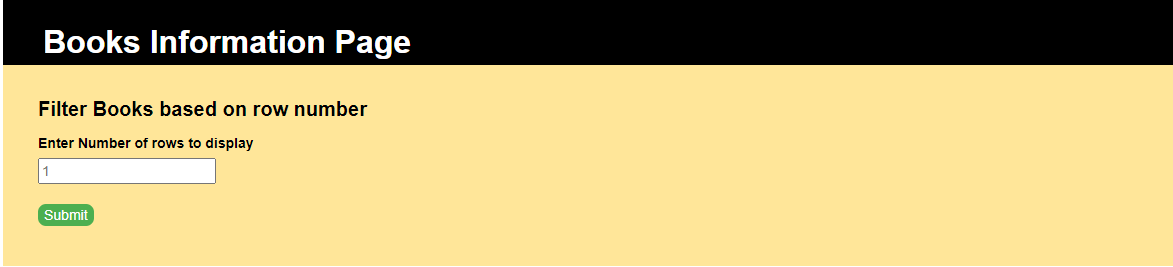

<h2 style="color:green">column.html</h2>

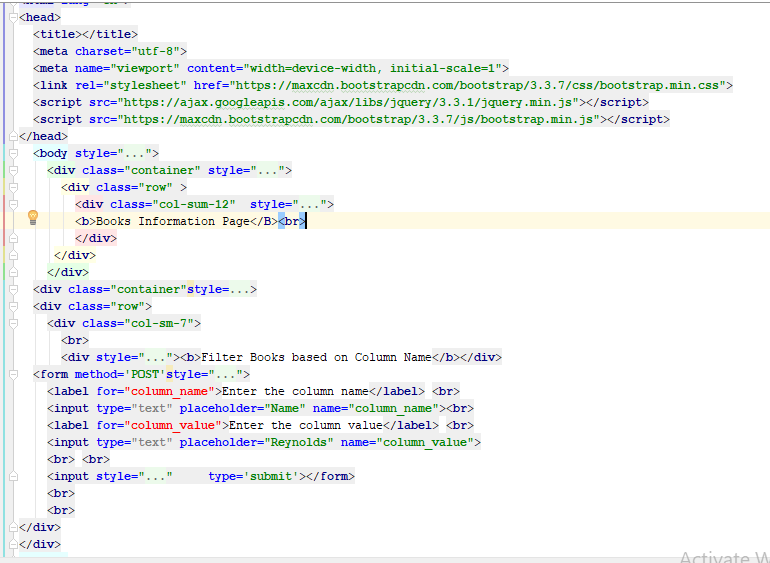
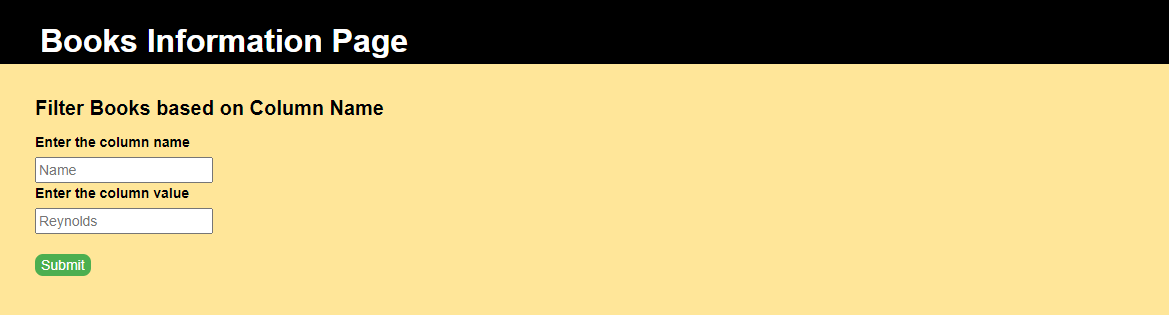

<h2 style="color:green">Requirement.txt</h2>

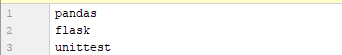

<h2 style="color:green">ICAV_assignment.py</h2>

In [2]:
from flask import Flask, render_template, request,  jsonify, json
import numpy as np
import pandas as pd

######### Reading Data from CSV file ##########
df = pd.read_csv("books.csv",index_col ="id")
df.head()

app = Flask(__name__)

@app.route('/api/home')
def index():
    return render_template('index.html')
        
@app.route('/api/home/row',methods=['GET'])
def rowFilter():
    return render_template('row.html')

@app.route('/api/home/row',methods=['POST'])
def rowFilterDisplay():
    row_num = request.form['row_num']
    df2 = df.reset_index()
    df2 = df2.replace(np.nan,"null")
    df_req = df2.head(int(row_num))
    temp_list = []
    books = {}
    for i in df_req.index:
        temp_dict = {}
        for key in df_req.keys():
            temp_dict[key] = str(df_req[key][i])
        temp_list.append(temp_dict)
        
    books['Books'] = temp_list
    books_json_object = json.dumps(books, indent = 4)
    print(books_json_object)
    out_file = open("myfile.json", "w") 
    json.dump(books, out_file, indent = 4) 
    out_file.close() 
    ##return books_json_object
    return render_template('resultapi1.html', title="page", jsonfile=books_json_object)


@app.route('/api/home/column',methods=['GET'])
def colFilter():
    return render_template('column.html')

@app.route('/api/home/column',methods=['POST'])
def colFilterDisplay():
    column_name = request.form['column_name']   
    column_value = request.form['column_value'] 
    df2 = df.reset_index()
    df2 = df2.replace(np.nan,"null")
    print(column_name)
    if column_name not in df2.keys():
        return render_template('resultapi1.html', title="page", jsonfile="The column name you enetred is not present in the file. Please try again!!")
    flag = []
    for i in df2.index:
        if ',' in df2[column_name][i]:
            if column_value in df2[column_name][i].split(','):
                flag.append(i)
                
        elif column_value == df2[column_name][i]:
            flag.append(i)
            
    df_req = df2.iloc[flag]
    temp_list = []
    books = {}
    for i in df_req.index:
        temp_dict = {}
        for key in df_req.keys():
            temp_dict[key] = str(df_req[key][i])
        temp_list.append(temp_dict)
        
    books['Books'] = temp_list
    books_json_object = json.dumps(books, indent = 4)
    print(books_json_object)
    return render_template('resultapi1.html', title="page", jsonfile=books_json_object)

    
if __name__ == "__main__":
    app.run(host='0.0.0.0',port=5005)


 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on all addresses.
 * Running on http://10.100.84.225:5005/ (Press CTRL+C to quit)
10.100.84.225 - - [29/Jun/2021 23:11:50] "GET / HTTP/1.1" 404 -
10.100.84.225 - - [29/Jun/2021 23:11:51] "GET /favicon.ico HTTP/1.1" 404 -
10.100.84.225 - - [29/Jun/2021 23:11:56] "GET /row HTTP/1.1" 404 -
10.100.84.225 - - [29/Jun/2021 23:12:05] "GET /api/home/row HTTP/1.1" 200 -
10.100.84.225 - - [29/Jun/2021 23:12:09] "GET /api/home HTTP/1.1" 200 -
10.100.84.225 - - [29/Jun/2021 23:12:12] "GET /api/home/row HTTP/1.1" 200 -
10.100.84.225 - - [29/Jun/2021 23:12:16] "POST /api/home/row HTTP/1.1" 200 -


{
    "Books": [
        {
            "author": "Bayo Ogunjimi",
            "authors": "Bayo Ogunjimi, Abdul Rasheed Na'allah",
            "dimensions": "8.30 (w) x 5.30 (h) x 0.80 (d)",
            "id": "7",
            "isbn10": "1592211518",
            "isbn13": "9781590000000.0",
            "lexile": "null",
            "pages": "146.0",
            "price": "$23.95",
            "publisher": "Africa World Press",
            "pubyear": "2006",
            "subjects": "Africa - Anthropology & Sociology, African Folklore & Mythology, Oral Tradition & Storytelling, General & Miscellaneous African Literature - Literary Criticism, African Literature Anthologies, Fables, Fairy Tales, & Folk Tales - Literary Criticism",
            "title": "Introduction to African Oral Literature and Performance"
        },
        {
            "author": "Reynolds Price",
            "authors": "Reynolds Price, Clifton Dowell, Reynolds Price",
            "dimensions": "8.36 (w) x 8.28 (h) x 0.50

10.100.84.225 - - [29/Jun/2021 23:12:18] "GET /api/home/row HTTP/1.1" 200 -
10.100.84.225 - - [29/Jun/2021 23:12:21] "GET /api/home/column HTTP/1.1" 200 -
10.100.84.225 - - [29/Jun/2021 23:12:28] "POST /api/home/column HTTP/1.1" 200 -


authors
{
    "Books": [
        {
            "author": "Jesse Grant",
            "authors": "Jesse Grant",
            "dimensions": "5.40 (w) x 8.50 (h) x 0.80 (d)",
            "id": "424",
            "isbn10": "1555838278",
            "isbn13": "9781560000000.0",
            "lexile": "null",
            "pages": "368.0",
            "price": "$1.99",
            "publisher": "Alyson Books",
            "pubyear": "2004",
            "subjects": "Fiction, American Literature Anthologies, Anthologies, Gay & Lesbian Studies, Fiction Subjects",
            "title": "Friction, Volume 7: Best Gay Erotic Fiction"
        }
    ]
}


10.100.84.225 - - [29/Jun/2021 23:12:30] "GET /api/home/column HTTP/1.1" 200 -
10.100.84.225 - - [29/Jun/2021 23:13:36] "POST /api/home/column HTTP/1.1" 200 -


authors
{
    "Books": []
}


### Home Page ------> GET /api/home

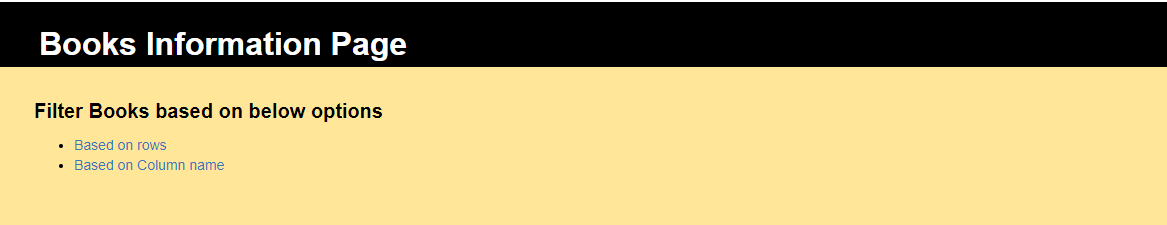

### API 1 -----> GET /api/home/row and POST /api/home/row

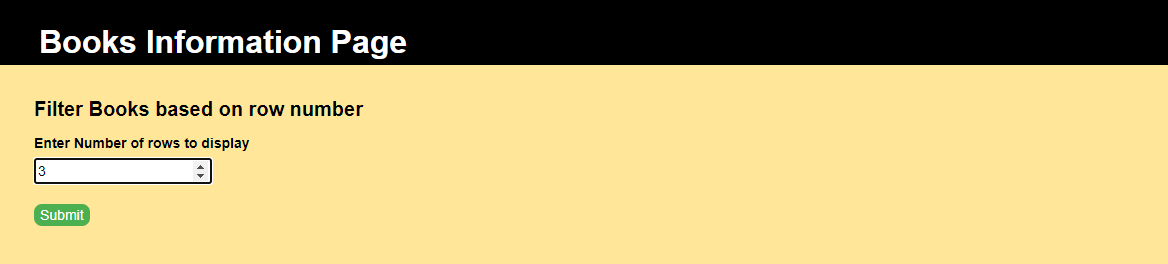

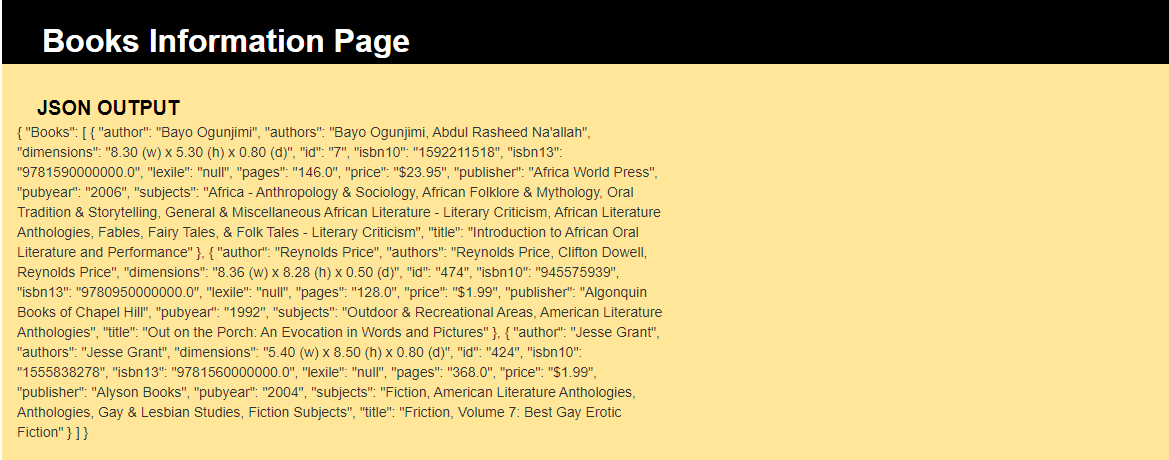

### API 2 -----> GET /api/home/column and POST /api/home/column

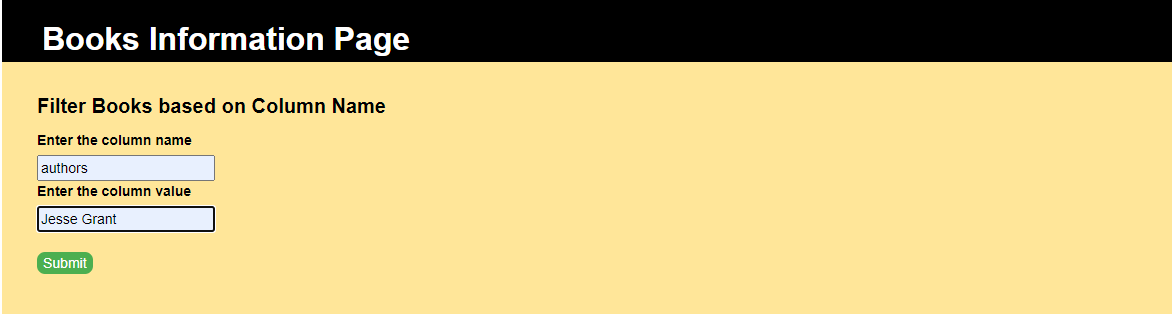

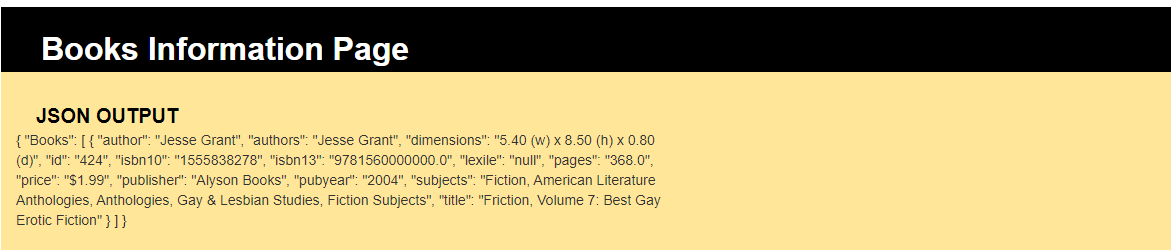

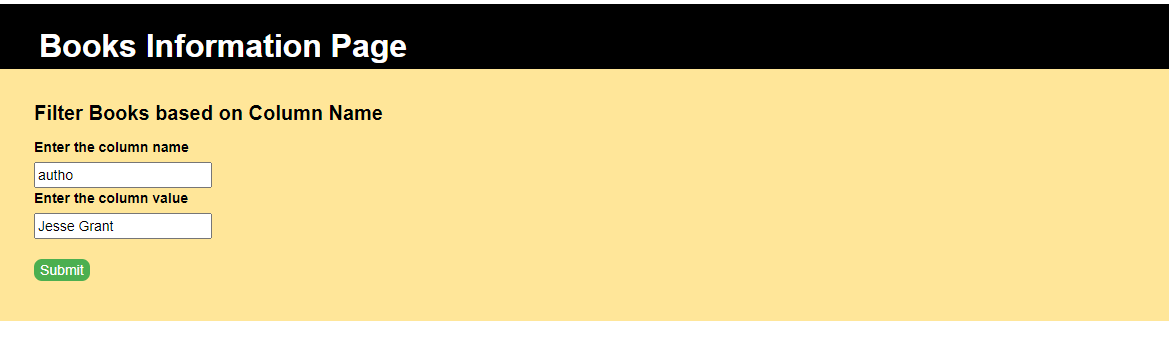

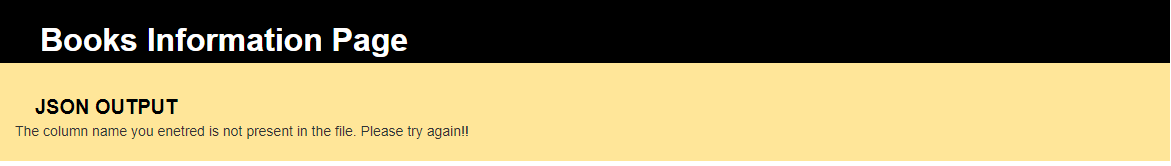

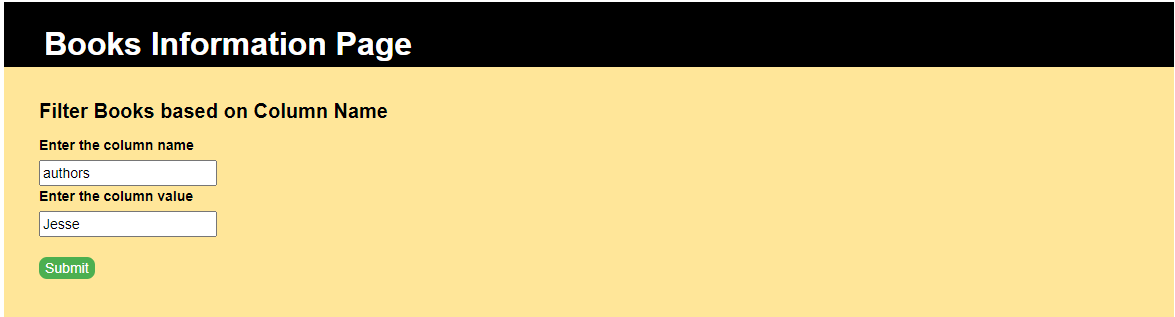

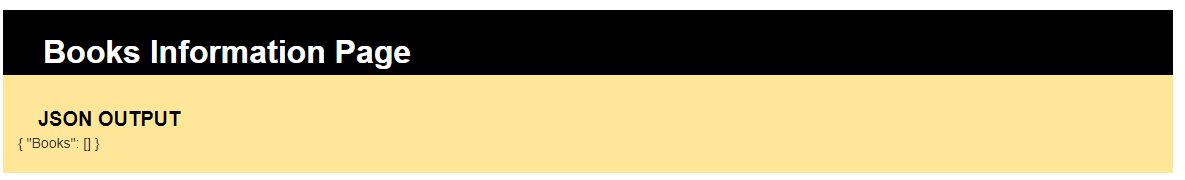

<h2 style="color:green">Dockerfile</h2>

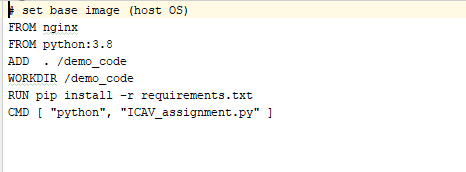

# Unit testing

<h2 style="color:green">test.py</h2>

In [ ]:
import unittest
from ICAV_assignment import app
class flaskAppTest(unittest.TestCase):

    #### Ensure that Flask was setup correctly ####
    def test_response(self):
        tester = app.test_client(self)
        response = tester.get("/api/home")
        status = response.status_code
        self.assertEqual(status, 200)
        
    #### Ensure the Home page loads correctly ####
    def test_content_type(self):
        tester = app.test_client(self)
        response = tester.get("/api/home")
        self.assertTrue(b'Filter Books based on below options' in response.data)

    #### Ensure that Flask API 1 was setup correctly ####
    def test_response_api1(self):
        tester = app.test_client(self)
        response = tester.get("/api/home/row")
        status = response.status_code
        self.assertEqual(status, 200)
        
    #### Ensure the API 1 page loads correctly ####
    def test_content_type_api1(self):
        tester = app.test_client(self)
        response = tester.get("/api/home/row")
        self.assertTrue(b'Filter Books based on row number' in response.data)

    #### Ensure that Flask API 2 was setup correctly ####
    def test_response_api2(self):
        tester = app.test_client(self)
        response = tester.get("/api/home/column")
        status = response.status_code
        self.assertEqual(status, 200)
        
    #### Ensure the API 2 page loads correctly ####
    def test_content_type_api2(self):
        tester = app.test_client(self)
        response = tester.get("/api/home/column")
        self.assertTrue(b'Filter Books based on Column Name' in response.data)
        
   
if __name__ == "__main__":
    unittest.main()


### Output of unit testing

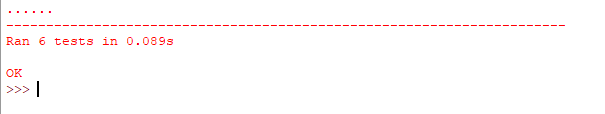